In [1]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

# returns a dataframe with the frequency of digits 0-9 from given list of nums
def get_frequencies(nums):
    freqs_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for num in nums:
        if not pd.isna(num):
            freqs_list[num] += 1
    freqs_df = pd.DataFrame(freqs_list, index=range(0, 10), columns=['freq'])

    return freqs_df

#returns the last digit of a number
def last_digit(num):
    # if the value is na or 0, return
    if pd.isna(num):
        return
    if num == 0:
        return
    # otherwise, return the last digit
    else:
        num = abs(int(num))
        return(int(str(num)[-1]))

In [2]:
drive_file = "Data/Drivingdata_cols.csv"

In [3]:
# read in the file and set up dictionaries to hold the digits and digit frequencies
data = pd.read_csv(drive_file, na_values=['-', 'ND'], header=[0])
last_digit_dict = {}
last_digit_freq = {}

# iterate through all the columns in the file
for column in data:
    # grab the numbers in the columns
    nums = data[column]
    # for each number in the column, store the last digit
    last_dig = [last_digit(num) for num in nums]
    # store the last digits of each column in a dictionary
    last_digit_dict[column] = last_dig

# create a variable to hold the percentages of each digit in each column
column_data = {}

# iterate through each column
for key in last_digit_dict.keys():
    # get the frequencies for each digit in the column
    frequencies = get_frequencies(last_digit_dict[key])
    # calculate the percentage
    frequencies['Percentage'] = frequencies['freq'] / sum(frequencies['freq']) * 100
    # store the percentages
    last_digit_freq[key] = frequencies

    # put the percentages in the dictionary
    column_data[key] = frequencies['Percentage']

# put the data in a dataframe
frequency_data = pd.DataFrame(column_data)

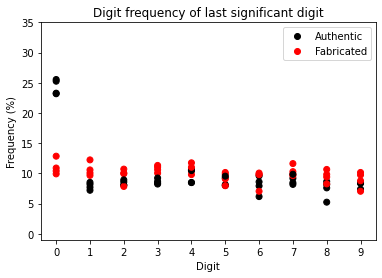

In [4]:
# transpose the dataframe to combine frequencies into 1 column
frequency_data_transposed = pd.DataFrame(frequency_data).T.stack().reset_index()
# rename the columns
frequency_data_transposed = frequency_data_transposed.rename(columns={0: "percentage", "level_1": "Digit"})

# we want to color by authentic and fabricated 
colors = {"Odom Reading 1 (Previous)": "black", "Odom Reading 1 (Update)": "red", "Odom Reading 2 (Previous)": "black", "Odom Reading 2 (Update)": "red", "Odom Reading 3 (Previous)": "black", "Odom Reading 3 (Update)": "red", "Odom Reading 4 (Previous)": "black", "Odom Reading 4 (Update)":"red"}
authentic = Line2D([], [], marker ='o', color='k', label='Authentic',
                         markerfacecolor='k', markersize=6, linestyle='None')
fabricated = Line2D([], [], marker ='o', color='r', label='Fabricated',
                         markerfacecolor='r', markersize=6, linestyle='None')

# plot the data
plt.scatter(x = 'Digit', y = 'percentage', data = frequency_data_transposed, c=frequency_data_transposed['level_0'].map(colors))
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylim(-1, 35)
plt.ylabel("Frequency (%)")
plt.xlabel("Digit")
plt.title("Digit frequency of last significant digit")
plt.legend(handles=[authentic, fabricated])
#plt.legend(('Authentic', 'Fabricated'))
# plt.savefig('Figures/Figure2_C', dpi=300)
plt.show()